# MATH 210 Introduction to Mathematical Computing

## March 26, 2018

1. Example: Van der pol oscillator
2. Intro to pandas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi
%matplotlib inline

### 1. Example : Van der pol oscillator

The [Van der Pol oscillator](https://en.wikipedia.org/wiki/Van_der_Pol_oscillator) is the second order nonlinear differential equation

$$
y'' - \mu (1 - y^2) y' + y = 0
$$

Let's write a function called `van_der_pol` which takes input parameters `mu`, `y0`, `t_0`, `t_f` and `h`. The function `van_der_pol` computes an approximation of a solution of the Van der pol equation using `scipy.integrate.odeint` on the interval $[t_0,t_f]$ with initial conditions $y(t_0),y'(t_0)$ given by the list `y0` of length 2. The `t` interval starts at `t0` and ends at `tf` and increments by step size `h` with `tf` as the final value. The function plots the solution $y(t)$ over the interval $[t_0,t_f]$ and returns a 2D NumPy array with $t$ values in the column at index 0 and $y$ values in column at index 1.

In [2]:
def van_der_pol(mu,y0,t0,tf,h):
    '''Solve and plot solution of the van der pol equation: y'' - \mu (1 - y^2) y' + y = 0
    
    Parameters
    ----------
    mu : parameter in the Van der Pol equation
    y0 : initial conditions [y(t_0),y'(t_0)]
    t_0 : start of the interval of integration [t_0,t_f]
    t_f : end of the interval of integration [t_0,t_f]
    h : time step between t values
    
    Returns
    -------
    Plot the corresponding solution given by scipy.integrate.odeint
    and returns a 2D NumPy array with t values in the column
    at index 0 and y values in column at index 1.
    '''
    def f(u,t):
        dudt = np.zeros(2)
        dudt[0] = u[1]
        dudt[1] = mu*(1 - u[0]**2)*u[1] - u[0]
        return dudt
    
    t = np.arange(t0,tf,h)
    t = np.append(t,tf)
    U = spi.odeint(f,y0,t)
    result = np.column_stack([t,U[:,0]])
    return result

In [3]:
solution = van_der_pol(10,[0,1],0,100,0.1)

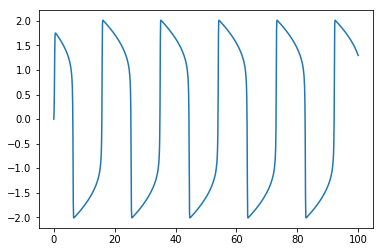

In [4]:
plt.plot(solution[:,0],solution[:,1]);

## 2. Intro to pandas

[pandas](http://pandas.pydata.org/) is the main Python package for data analysis. The core object in pandas is the [DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) which is like a spreadsheet with column headers, row index and values.

Let's find some data and try to import it as a pandas DataFrame using `pandas.read_csv`.

In [5]:
import pandas as pd

Let's go to the Government of Canada's [Open Data Portal](https://open.canada.ca/data/en/dataset?portal_type=dataset) and search "University". The first result is [Universities and colleges revenue and expenditures](https://open.canada.ca/data/en/dataset/66def988-48ca-4cc5-8e0b-19d9b73f6266). Download the data and save the data to the same directory as this notebook. If you are using [ubc.syzygy.ca](https://ubc.syzygy.ca/) then you must upload the file from your computer to [ubc.syzygy.ca](https://ubc.syzygy.ca/). The file is names `govt31a-eng.csv`. Let's take a look!

In [6]:
data = pd.read_csv('govt31a-eng.csv')

CParserError: Error tokenizing data. C error: Expected 6 fields in line 4, saw 7


ERROR!!! It turns out that that lines 0, 1, 2, 4, 25, and 26 care either empty or contain header/footer footer information that we want to skip. Also , the numbers has commas `,` to indicate thousands. We consult the pandas.read_csv documentation to deal with these issues.

In [7]:
data = pd.read_csv('govt31a-eng.csv',skiprows=[0,1,2,4,25,26],index_col=0,thousands=",")

In [8]:
data.head()

,2005,2006,2007,2008,2009,Unnamed: 6
Total revenue,29484455,31296336,33442589,36219454,37441581,NaN
Own source revenue,13336261,14074771,14891573,16244024,16779804,NaN
Sales of goods and services,10520144,10958828,11473607,12429235,12897731,NaN
Tuition fees,6152681,6416268,6784499,7405380,7681008,NaN
Other sales of goods and services,4367463,4542559,4689108,5023855,5216723,NaN


In [9]:
data.tail()

,2005,2006,2007,2008,2009,Unnamed: 6
Education,14250885,14947966,15780869,17007798,17691098,NaN
Support to students,1031730,1100234,1191590,1335982,1359762,NaN
Other postsecondary education expenses,8038995,8371513,8476235,8938284,9363476,NaN
Debt charges,606483,643871,650094,709514,740786,NaN
Surplus or deficit,-125158,240808,425927,532978,474872,NaN


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, Total revenue to Surplus or deficit
Data columns (total 6 columns):
2005          20 non-null int64
2006          20 non-null int64
2007          20 non-null int64
2008          20 non-null int64
2009          20 non-null int64
Unnamed: 6    0 non-null float64
dtypes: float64(1), int64(5)
memory usage: 1.1+ KB


Success! We imported the data! The columns which should be numbers are imported as numbers and not as text (ie. object) and we are ready to analyze the data!

The only issue is that the data set only has 20 rows. BORING!!!